In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/cuda/diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
!pip install torch

In [10]:
import torch
torch.cuda.is_available()

True

In [11]:
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

import time
start = time.time()
a.matmul(b)
end = time.time()
print("{} seconds".format(end - start))

22.901872634887695 seconds


In [12]:
a = a.cuda()
b = b.cuda()

start = time.time()
a.matmul(b)
end = time.time()
print("{} seconds".format(end - start))


0.011850357055664062 seconds


In [14]:
print(type(a),type(b))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [81]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
##### Creating Tensors
X_train=torch.FloatTensor(X_train_scaled).cuda()
X_test=torch.FloatTensor(X_test_scaled).cuda()
y_train=torch.LongTensor(y_train.values).cuda()
y_test=torch.LongTensor(y_test.values).cuda()



In [182]:
from torch import nn
import torch.nn.functional as F

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=32,hidden2=16,hidden3=8,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.f_connected3=nn.Linear(hidden2,hidden3)
        self.out=nn.Linear(hidden3,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=F.relu(self.f_connected3(x))
        x=self.out(x)
        return x

In [183]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()
print(model)

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=32, bias=True)
  (f_connected2): Linear(in_features=32, out_features=16, bias=True)
  (f_connected3): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=2, bias=True)
)


In [184]:
print(model.f_connected1.bias)

Parameter containing:
tensor([ 0.1839,  0.0752,  0.2938,  0.1688,  0.1144, -0.1659, -0.3393, -0.2614,
        -0.2888, -0.3511, -0.0987,  0.1402, -0.3385, -0.0779, -0.2267,  0.0677,
        -0.3532,  0.1734,  0.3116, -0.3038, -0.1018, -0.0179,  0.3468,  0.3197,
         0.1565,  0.0601, -0.1465, -0.3120, -0.0092,  0.0577,  0.1012,  0.3057],
       requires_grad=True)


In [185]:
print(model.f_connected1.weight)

Parameter containing:
tensor([[ 0.0435, -0.2281,  0.2225, -0.1205, -0.1896,  0.2002,  0.2506, -0.2820],
        [-0.2208,  0.3048, -0.2900, -0.1304,  0.3128, -0.1742,  0.1689,  0.0285],
        [-0.0456, -0.0403,  0.0889, -0.3268,  0.1506, -0.1252,  0.3275, -0.1920],
        [-0.0361, -0.2042,  0.1300,  0.1752, -0.0264,  0.1939, -0.0806, -0.3022],
        [ 0.2642, -0.1054, -0.1217, -0.1234, -0.1839, -0.0154, -0.1907,  0.1026],
        [ 0.0369,  0.1485, -0.2521,  0.1423,  0.2064, -0.3484,  0.1894, -0.1130],
        [-0.2231, -0.2958, -0.3185,  0.0140,  0.0713,  0.1848,  0.2910,  0.2082],
        [-0.3351,  0.3172, -0.0193,  0.1992,  0.3035, -0.0423,  0.0716,  0.2527],
        [ 0.2203,  0.2263, -0.1873,  0.1679, -0.0071, -0.1656, -0.2603,  0.3361],
        [-0.1578,  0.2102,  0.1585, -0.2564, -0.0078, -0.3381, -0.0064,  0.2354],
        [-0.0180, -0.3428,  0.1465,  0.0387,  0.0399,  0.0387, -0.2971, -0.3012],
        [-0.3242,  0.2976, -0.3156, -0.2330, -0.0870,  0.0748, -0.2671, -0.2

In [186]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=32, bias=True)
  (f_connected2): Linear(in_features=32, out_features=16, bias=True)
  (f_connected3): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=2, bias=True)
)>

In [187]:
y_train.device

device(type='cuda', index=0)

In [188]:
for i in model.parameters():
    print(i.is_cuda)

False
False
False
False
False
False
False
False


In [189]:
model=model.cuda()

In [190]:
model

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=32, bias=True)
  (f_connected2): Linear(in_features=32, out_features=16, bias=True)
  (f_connected3): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=2, bias=True)
)

In [191]:
for i in model.parameters():
    print(i.is_cuda)

True
True
True
True
True
True
True
True


In [192]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [193]:
import time
start_time=time.time()
epochs=10000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(time.time()-start_time)

Epoch number: 1 and the loss : 0.7093948125839233
Epoch number: 11 and the loss : 0.506426215171814
Epoch number: 21 and the loss : 0.4559498727321625
Epoch number: 31 and the loss : 0.43132928013801575
Epoch number: 41 and the loss : 0.40658673644065857
Epoch number: 51 and the loss : 0.378065288066864
Epoch number: 61 and the loss : 0.33788368105888367
Epoch number: 71 and the loss : 0.2994823455810547
Epoch number: 81 and the loss : 0.27316001057624817
Epoch number: 91 and the loss : 0.24124260246753693
Epoch number: 101 and the loss : 0.2120829075574875
Epoch number: 111 and the loss : 0.20233753323554993
Epoch number: 121 and the loss : 0.18078675866127014
Epoch number: 131 and the loss : 0.1585749238729477
Epoch number: 141 and the loss : 0.13835546374320984
Epoch number: 151 and the loss : 0.11995892226696014
Epoch number: 161 and the loss : 0.1029631495475769
Epoch number: 171 and the loss : 0.10319641977548599
Epoch number: 181 and the loss : 0.11124332249164581
Epoch number: 

Text(0.5, 0, 'Epoch')

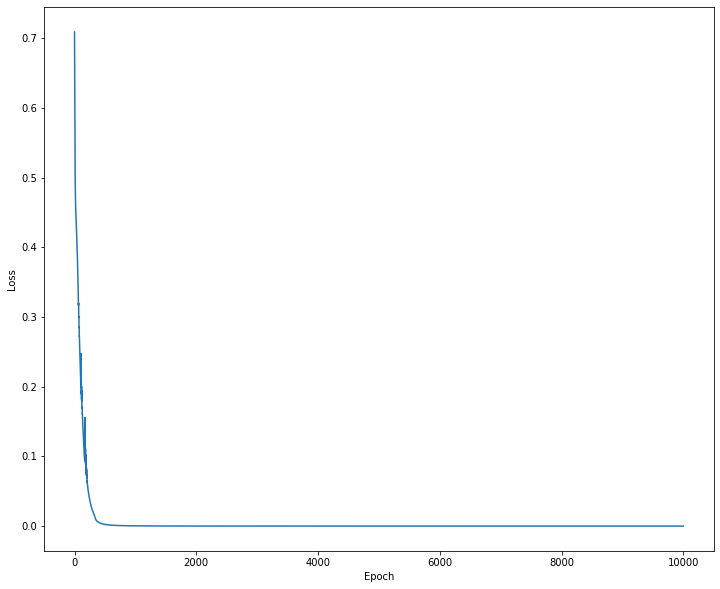

In [194]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [195]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
1
1
0
0
0
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
0
1
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
1
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [196]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred1)
cm

TypeError: ignored

In [197]:
type(predictions)

list

In [198]:
type(y_test)

torch.Tensor

In [199]:
y_test1 = y_test.cpu().numpy()

In [200]:
y_test1

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [201]:
import numpy as np
predictions1 = np.array(predictions)

In [202]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test1,predictions1)
cm

array([[83, 24],
       [18, 29]])

Text(69.0, 0.5, 'Predicted Values')

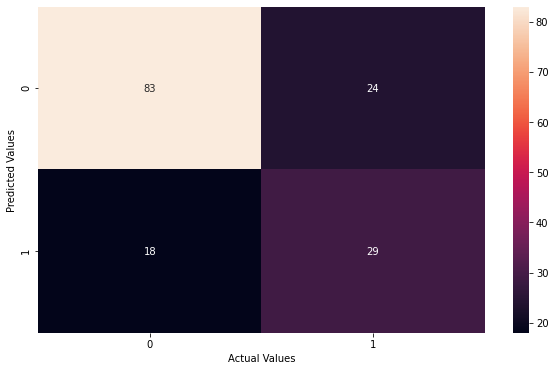

In [203]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [204]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test1,predictions1)
score

0.7272727272727273